# Part 1 – Feedforward Neural Network (FNN)

**(a)**

We will outline the key components of a Feedforward Neural Network, including:
- The activation function
- The loss function
- The forward propagation
- The backward propagation
- The gradient descent algorithm

Following these descriptions, we will present the complete implementation of the Feedforward Neural Network.

**1. Activation Function:**
    
    The activation function introduces non-linearity, enabling the network to learn complex patterns and relationships in data. And the derivative of the activation function is used during backpropagation to compute gradients.
    - ReLU (Rectified Linear Unit)
       
    - tanh (Hyperbolic Tangent)

    - sigmoid (Logistic Function)
 

```python
def activation(self, z):  
        # using relu function here
        if self.activation_type == "relu":
            return np.maximum(0, z)
        elif self.activation_type == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif self.activation_type == "tanh":
            return np.tanh(z)
        else:
            raise Exception("Invalid activation function")

    def activation_derivative(self, z):
        if self.activation_type == "relu":
            return (z > 0).astype(float)
        elif self.activation_type == "sigmoid":
            s = 1 / (1 + np.exp(-z))
            return s * (1 - s)
        elif self.activation_type == "tanh":
            t = np.tanh(z)
            return 1 - t**2
        else:
            raise Exception("Invalid activation function")
```

**2. Loss Function:**

    The loss function quantifies the difference between the network’s predicted outputs (𝑦_pred) and the true values (𝑦_train).
    We use the Mean Squared Error (MSE) loss function:
    
    - Mean Squared Error (MSE):
        
            MSE = (1 / 𝑛) * Σ(i=1 to 𝑛) (𝑦_pred,𝑖 − 𝑦_train,𝑖)²

```python
def compute_cost(self, y_pred, y_train):    
    return np.mean((y_pred - y_train)**2)
```

**3. Forward Propagation:**

    Forward propagation passes input data through each layer of the network to generate output predictions.
        
      - Layer-wise Computation:
        
            Linear transformation:
            
                𝑧[𝑙] = 𝑊[𝑙]𝑎[𝑙−1] + 𝑏[𝑙]
                
            Activation function:
            
                𝑎[𝑙] = 𝑓(𝑧[𝑙])
                
      - Intermediate Storage
      
            During forward propagation:
   
                Pre-activations (z[l]): Linear transformations before activation.
                Activations (a[l]): Output of each layer.
                      
            These values are stored for each layer and later used during backpropagation.

```python
def feedforward(self, x):
    a_values = [x] # values after activation functions
    z_values = [] # values before activation functions
    for w, b in zip(self.weights, self.biases):
        z = np.dot(w, a_values[-1]) + b
        z_values.append(z)
        a = self.activation(z) if len(z_values) < self.num_layers - 1 else z
        a_values.append(a)
    return a_values, z_values
```

**4. Backward propagation**

      Backward propagation computes the gradients of the loss function with respect to the weights and biases using the chain rule. The gradients are used to update the parameters during optimization.

```python
def backward_propagation(self, X, y):
    m = X.shape[1]
    dZ = self.activations[-1] - y
    gradients = []
    for l in reversed(range(len(self.weights))):
        dW = np.dot(dZ, self.activations[l].T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dZ = np.dot(self.weights[l].T, dZ) * (self.activations[l] > 0)
        gradients.append((dW, db))
    return gradients[::-1]
```

**5. Gradient descent algorithm**

      We use Stochastic Gradient Descent (SGD) to minimize the loss function. The weights and biases are updated as follows:

```python
def update_parameters(self, gradients, learning_rate):
    for i, (dW, db) in enumerate(gradients):
        self.weights[i] -= learning_rate * dW
        self.biases[i] -= learning_rate * db


**Complete Python implementation of the FNN:**

In [51]:
from matplotlib import pyplot as plt
import numpy as np


# Data generation for the Poisson equation
def generate_data(num_points=99):
    def analytical_solution(x, y):
        # Poisson equation analytical solution
        sol = np.sin(np.pi * x) * np.sin(np.pi * y)
        sol[(x == 1) | (y == 1)] = 0
        return sol
    x = np.linspace(0, 1, num_points)
    y = np.linspace(0, 1, num_points)
    X, Y = np.meshgrid(x, y)
    u = analytical_solution(X, Y)
    return np.c_[X.ravel(), Y.ravel()], u.ravel()

class FeedforwardNeuralNetwork:
    def __init__(self, layer_sizes, activation_type = "relu"):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        if activation_type in ["relu", "sigmoid", "tanh"]:
            self.activation_type = activation_type
        else:
            raise ValueError(f"Invalid activation function '{activation_type}'. Supported types: relu, sigmoid, tanh.")
        self.weights = []
        self.biases = []
        
        # initialize all weights with N(0,1) * 0.01
        # Initialize all biases with 0
        for i in range(1, len(self.layer_sizes)):
            self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i - 1]) * 0.01)
            self.biases.append(np.zeros((self.layer_sizes[i], 1)))

    def activation(self, z):  
        if self.activation_type == "relu":
            return np.maximum(0, z)
        elif self.activation_type == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif self.activation_type == "tanh":
            return np.tanh(z)
        else:
            raise Exception("Invalid activation function")

    def activation_derivative(self, z):
        if self.activation_type == "relu":
            return (z > 0).astype(float)
        elif self.activation_type == "sigmoid":
            s = 1 / (1 + np.exp(-z))
            return s * (1 - s)
        elif self.activation_type == "tanh":
            t = np.tanh(z)
            return 1 - t**2
        else:
            raise Exception("Invalid activation function")

    def feedforward(self, x):
        a_values = [x] # values after activation functions
        z_values = [] # values before activation functions
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a_values[-1]) + b
            z_values.append(z)
            a = self.activation(z) if len(z_values) < self.num_layers - 1 else z
            a_values.append(a)
        return a_values, z_values

    def compute_cost(self, y_pred, y_train):
        return np.mean((y_train - y_pred)**2)

    def loss_gradient(self, y_pred, y_true):
        return 2 * (y_pred - y_true) / y_true.shape[1]

    def backpropagate(self, z_values, a_values, loss_grad):
        # initialize the gradient for a, w and b
        w_gradient = []
        b_gradient = []
        
        # no activation function for output layers
        # compute the loss for the output layer individually
        # let error be np.mean(y_pred - y)
        z_gradient = loss_grad  # shape = {1, batch_size}
        w_gradient.append(z_gradient @ a_values[-2].T) # shape = {1, a_{L-1}}
        b_gradient.append(np.sum(z_gradient, axis = -1)[:,None]) # shape = {1, 1}
        
        for l in range(2, self.num_layers):
            
            # compute the gradient of loss w.r.t z^{-l} first
            ## l start from the 2nd to last layer 
            ## we have dz^{-l} = W^{a_{-l+1}, a^{-l}}^T @ (derivative of activation * dz^{-l+1})
            
            ## the derivative of activation function
            # # derivative of a^{-l} w.r.t z^{-l} 
            act_de = self.activation_derivative(z_values[-l]) # shape = {a_{-l}, batch_size}
            
            ## the derivative of loss w.r.t z^{-l} 
            z_gradient = self.weights[-l + 1].T @ z_gradient * act_de # shape = {a_{-l}, batch_size}
            
            # the derivative of loss w.r.t w^{a^{-l}, a^{l-1}}
            w_gradient.append(z_gradient @ a_values[-l - 1].T) # shape = {a_{-l}, a_{-l - 1}}
            
            # the derivative of loss w.r.t b^{a^{-l}}
            b_gradient.append(np.sum(z_gradient, axis = -1)[:,None]) # shape = {a_{-l}, 1}
            
        return w_gradient[::-1], b_gradient[::-1]

    def update_parameters(self, nabla_w, nabla_b, learning_rate, opt_type = "sgd"):
        if opt_type == "sgd":
            self.weights = [w - learning_rate * dw for w, dw in zip(self.weights, nabla_w)]
            self.biases = [b - learning_rate * db for b, db in zip(self.biases, nabla_b)]
        elif opt_type == "adam":
            if not hasattr(self, "adm_step"):
                self.adm_step = 1
                self.w_f = [np.zeros_like(w) for w in self.weights] # 1st order moment for weights 
                self.w_s = [np.zeros_like(w) for w in self.weights] # 2nd order moment for weights
                
                self.b_f = [np.zeros_like(b) for b in self.biases] # 1st order moment for biases
                self.b_s = [np.zeros_like(b) for b in self.biases] # 2nd order moment for biases
            
            # initial parameters
            eps = 1e-10
            beta1 = 0.9
            beta2 = 0.999
            factor1 = 1 - beta1**self.adm_step
            factor2 = 1 - beta2**self.adm_step
            
            for i in range(len(nabla_w)):
                self.b_f[i] = beta1 * self.b_f[i] + (1-beta1) * nabla_b[i]
                self.w_f[i] = beta1 * self.w_f[i] + (1-beta1) * nabla_w[i]
                
                self.b_s[i] = beta2 * self.b_s[i] + (1-beta2) * (nabla_b[i]**2)
                self.w_s[i] = beta2 * self.w_s[i] + (1-beta2) * (nabla_w[i]**2)
                
                b_f_hat = self.b_f[i]/factor1
                w_f_hat = self.w_f[i]/factor1
                
                b_s_hat = self.b_s[i]/factor2
                w_s_hat = self.w_s[i]/factor2
                
                self.weights[i] -= learning_rate * w_f_hat / (eps + np.sqrt(w_s_hat))
                self.biases[i] -= learning_rate * b_f_hat / (eps + np.sqrt(b_s_hat))
                
            self.adm_step +=1
        else:
            raise Exception(f"Invalid optimization type {opt_type}. Supported types: \"sgd\", \"adam\".")
        
    def train(self, x_train, y_train, epochs, learning_rate, batch_size, opt_type = "sgd", x_val=None, y_val=None, interval = 10):
        np.random.seed(42)
        num_samples = x_train.shape[1]
        record = None

        if x_val is not None and y_val is not None:
            record = {
                "epoch": [],
                "train_loss": [],
                "test_loss": []
            }

        for iter in range(epochs):
            idx = np.random.permutation(num_samples)
            x_train = x_train[:,idx]
            y_train = y_train[:,idx]

            # record the training and testing/validation loss during model training
            if iter % interval == 0 and record is not None:
                a_values_full_train, _ = self.feedforward(x_train)
                train_loss = self.compute_cost(a_values_full_train[-1], y_train)

                record["epoch"].append(iter + 1)
                record["train_loss"].append(train_loss)

                a_values_full_val, _ = self.feedforward(x_val)
                val_loss = self.compute_cost(a_values_full_val[-1], y_val)
                record["test_loss"].append(val_loss)

                if iter % (interval * 10) == 0:
                    print(f"Epoch {iter + 1}: Train Loss = {train_loss:.6f}, Test Loss = {val_loss:.6f}")

            # Mini-batch training
            # -( n // -d) is equivalent to ceil(n/d) in Python
            for i in range(-(num_samples // -batch_size)):
                if (i+1) * batch_size >= num_samples:
                    x_batch = x_train[:,i * batch_size:]
                    y_batch = y_train[:,i * batch_size:]
                else:
                    x_batch = x_train[:,i * batch_size: (i + 1) * batch_size]
                    y_batch = y_train[:,i * batch_size: (i + 1) * batch_size]
                
                # Forward & Backward Propagation
                a_values, z_values = self.feedforward(x_batch)
                loss_grad = self.loss_gradient(a_values[-1], y_batch)
                nabla_w, nabla_b = self.backpropagate(z_values, a_values, loss_grad)
                self.update_parameters(nabla_w, nabla_b, learning_rate, opt_type)
        return record

**Evaluation**

In this section, we evaluate the performance of the trained feedforward neural network by testing it on a separate validation dataset. The entire dataset was divided into 70% training data and 30% validation data. In the following analysis, we compare the results under three activation functions: ReLU, tanh, and sigmoid, to assess their respective impacts on the model's performance.

**1. ReLU**

In [44]:
# In[] Initialize data
input_data, output_data = generate_data(num_points=100)
sample_num = input_data.shape[0]
permute_idx = np.random.permutation(sample_num)
input_data = input_data.T[:,permute_idx]
output_data = output_data[None,:][:, permute_idx]

# In[] testing code
nn = FeedforwardNeuralNetwork([2, 32, 32, 1], activation_type="relu")
split_ratio = 0.7
train_num = int(sample_num * split_ratio)
x_train, x_test = input_data[:, :train_num], input_data[:, train_num:]
y_train, y_test = output_data[:, :train_num], output_data[:, train_num:]

# Train the network
record = nn.train(x_train, y_train, epochs=1001, learning_rate=0.0001, batch_size=64, opt_type="adam", x_val=x_test, y_val=y_test)

# Test error
activations, _ = nn.feedforward(x_train)
y_pred = activations[-1]
test_loss = nn.compute_cost(y_pred, y_train)

# Validate the network
activations, _ = nn.feedforward(x_test)
y_pred = activations[-1]
val_loss = nn.compute_cost(y_pred, y_test)

print(test_loss, val_loss)

Epoch 1: Train Loss = 0.244126, Test Loss = 0.247138
Epoch 101: Train Loss = 0.010249, Test Loss = 0.011508
Epoch 201: Train Loss = 0.009237, Test Loss = 0.010417
Epoch 301: Train Loss = 0.009216, Test Loss = 0.010295
Epoch 401: Train Loss = 0.009195, Test Loss = 0.010360
Epoch 501: Train Loss = 0.009224, Test Loss = 0.010398
Epoch 601: Train Loss = 0.009179, Test Loss = 0.010286
Epoch 701: Train Loss = 0.009174, Test Loss = 0.010274
Epoch 801: Train Loss = 0.009171, Test Loss = 0.010298
Epoch 901: Train Loss = 0.009202, Test Loss = 0.010268
Epoch 1001: Train Loss = 0.009204, Test Loss = 0.010386
0.009176882547760461 0.01029655335650506


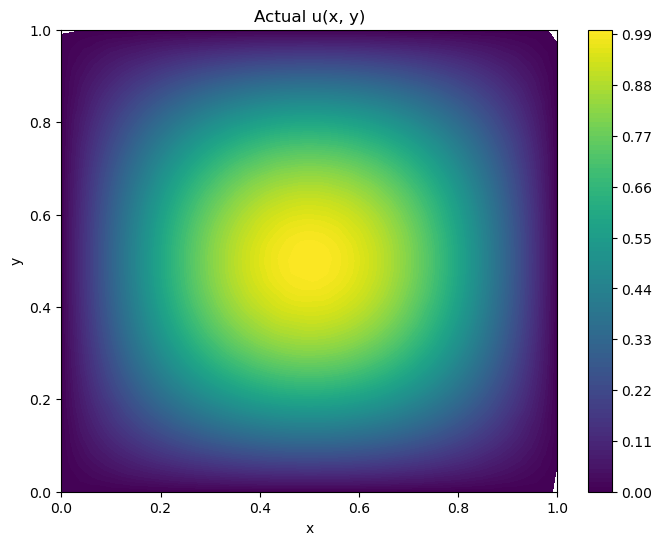

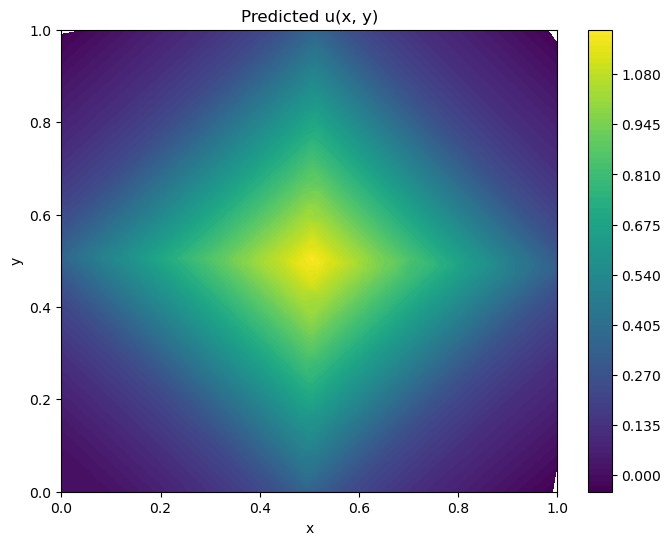

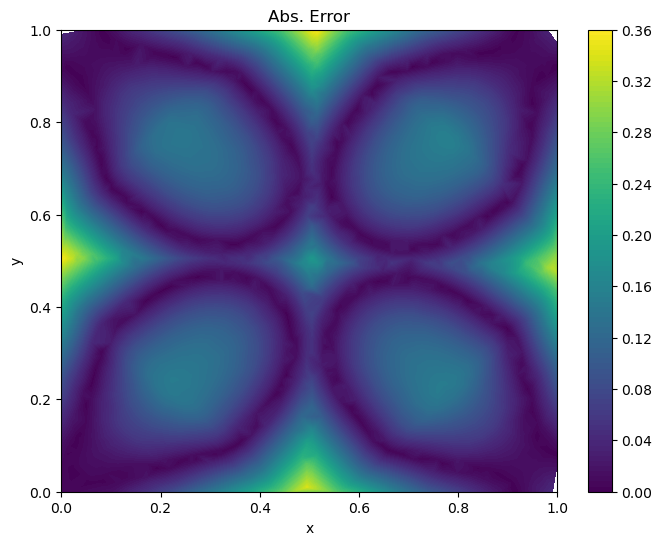

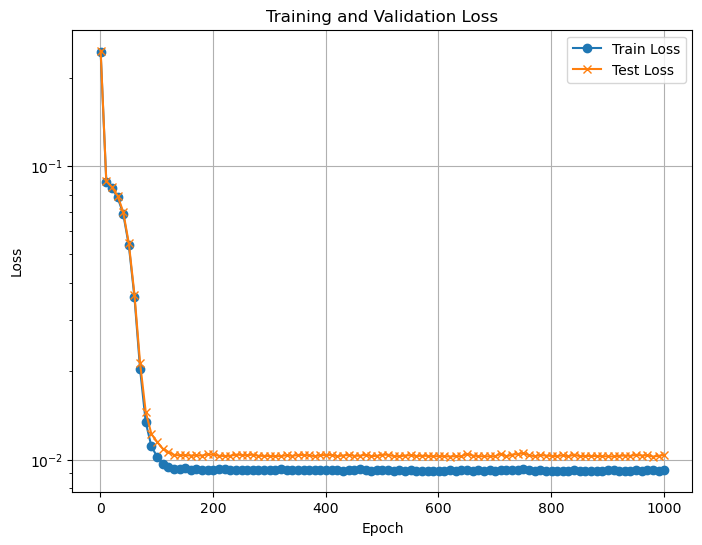

In [45]:
# Visualization
def visualization_2D(x, y, u, title):
    plt.figure(figsize=(8, 6))
    plt.tricontourf(x, y, u, levels=100, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

visualization_2D(x_test[0,:], x_test[1,:], y_test[0,:], title= "Actual u(x, y)")
visualization_2D(x_test[0,:], x_test[1,:], y_pred[0,:], title="Predicted u(x, y)")

abs_error = np.abs(y_pred[0,:] - y_test[0,:])
visualization_2D(x_test[0,:], x_test[1,:], abs_error, title= "Abs. Error")

# In[] Error Curve
def plot_training_history(record):
    epochs = record.get("epoch", [])
    train_loss = record.get("train_loss", [])
    test_loss = record.get("test_loss", [])

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, test_loss, label='Test Loss', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(record)

In the stable phase (Epoch 201 → Epoch 1001), the training loss and validation loss for the model using the ReLU activation function exhibit minimal differences, indicating no significant overfitting. The predicted solution closely aligns with the analytical solution of the Poisson equation. In the absolute error distribution, the errors are primarily concentrated near the four corners and boundaries of the domain, with a maximum error of approximately 0.36. In contrast, the errors in the central region are minimal (close to zero), demonstrating the model's high prediction accuracy in the interior region.

**2. tanh**

In [ ]:
# In[] Initialize data
input_data, output_data = generate_data(num_points=100)
sample_num = input_data.shape[0]
permute_idx = np.random.permutation(sample_num)
input_data = input_data.T[:,permute_idx]
output_data = output_data[None,:][:, permute_idx]

# In[] testing code
nn = FeedforwardNeuralNetwork([2, 32, 32, 1], activation_type="tanh")
split_ratio = 0.7
train_num = int(sample_num * split_ratio)
x_train, x_test = input_data[:, :train_num], input_data[:, train_num:]
y_train, y_test = output_data[:, :train_num], output_data[:, train_num:]

# Train the network
record = nn.train(x_train, y_train, epochs=1001, learning_rate=0.0001, batch_size=64, opt_type="adam", x_val=x_test, y_val=y_test)

# Test error
activations, _ = nn.feedforward(x_train)
y_pred = activations[-1]
test_loss = nn.compute_cost(y_pred, y_train)

# Validate the network
activations, _ = nn.feedforward(x_test)
y_pred = activations[-1]
val_loss = nn.compute_cost(y_pred, y_test)

print(test_loss, val_loss)

Epoch 1: Train Loss = 0.242417, Test Loss = 0.251063
Epoch 101: Train Loss = 0.086840, Test Loss = 0.088360
Epoch 201: Train Loss = 0.086827, Test Loss = 0.088420
Epoch 301: Train Loss = 0.086834, Test Loss = 0.088366
Epoch 401: Train Loss = 0.086844, Test Loss = 0.088499


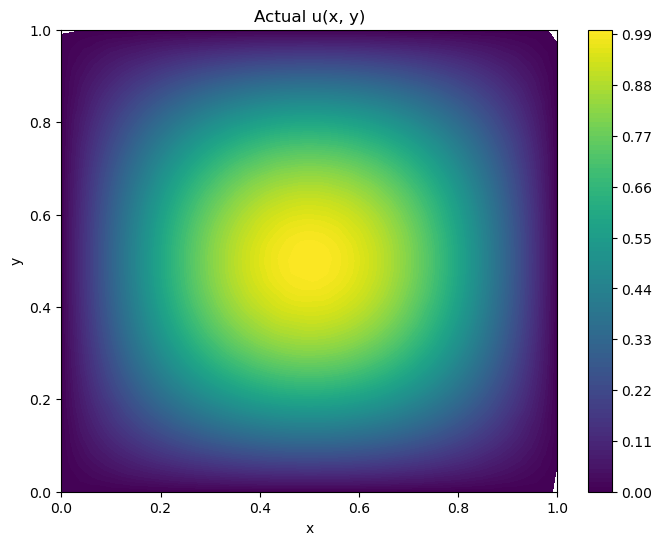

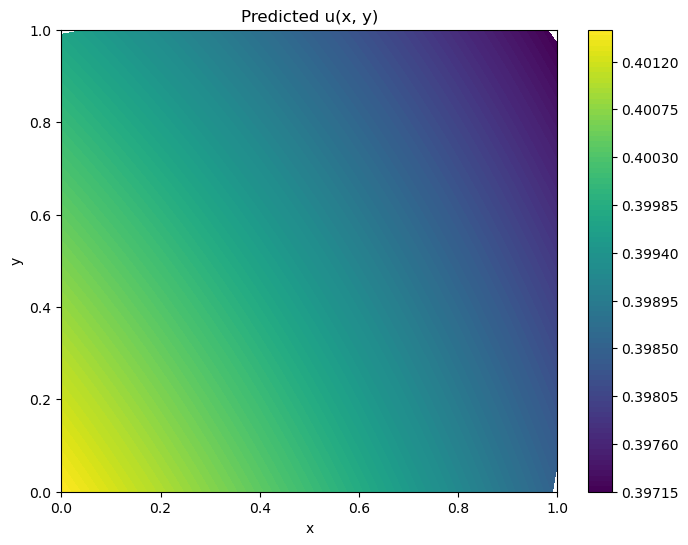

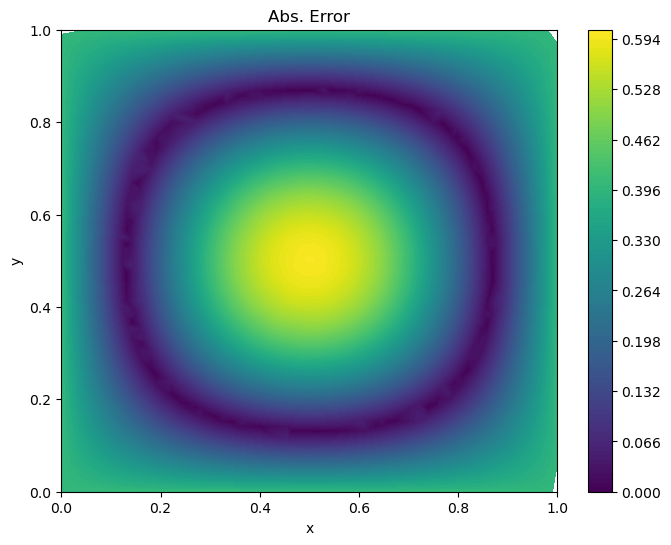

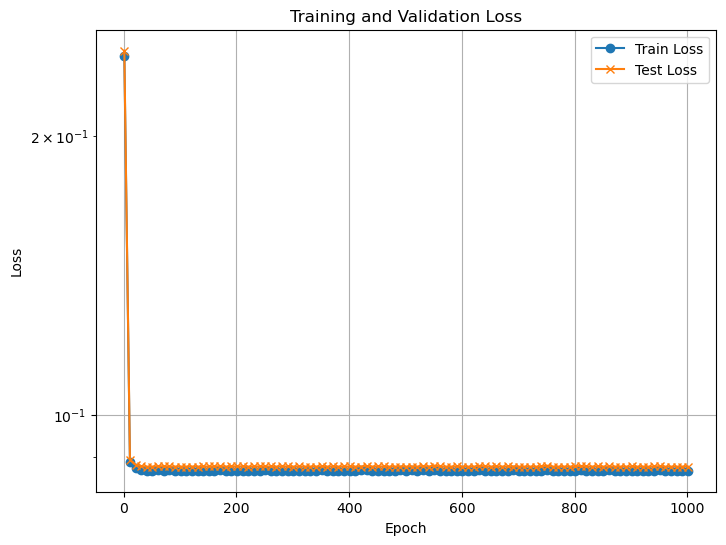

In [47]:
# Visualization
def visualization_2D(x, y, u, title):
    plt.figure(figsize=(8, 6))
    plt.tricontourf(x, y, u, levels=100, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

visualization_2D(x_test[0,:], x_test[1,:], y_test[0,:], title= "Actual u(x, y)")
visualization_2D(x_test[0,:], x_test[1,:], y_pred[0,:], title="Predicted u(x, y)")

abs_error = np.abs(y_pred[0,:] - y_test[0,:])
visualization_2D(x_test[0,:], x_test[1,:], abs_error, title= "Abs. Error")

# In[] Error Curve
def plot_training_history(record):
    epochs = record.get("epoch", [])
    train_loss = record.get("train_loss", [])
    test_loss = record.get("test_loss", [])

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, test_loss, label='Test Loss', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(record)

The training and validation losses converge quickly without overfitting. However, compared to ReLU, the loss with tanh is significantly higher (0.087 vs 0.010). This indicates that the tanh activation function is less effective for solving this problem, likely due to gradient saturation near −1 and 1, which restricts the learning process.

**3. sigmoid**

In [53]:
# In[] Initialize data
input_data, output_data = generate_data(num_points=100)
sample_num = input_data.shape[0]
permute_idx = np.random.permutation(sample_num)
input_data = input_data.T[:,permute_idx]
output_data = output_data[None,:][:, permute_idx]

# In[] testing code
nn = FeedforwardNeuralNetwork([2, 32, 32, 1], activation_type="sigmoid")
split_ratio = 0.7
train_num = int(sample_num * split_ratio)
x_train, x_test = input_data[:, :train_num], input_data[:, train_num:]
y_train, y_test = output_data[:, :train_num], output_data[:, train_num:]

# Train the network
record = nn.train(x_train, y_train, epochs=1001, learning_rate=0.0001, batch_size=64, opt_type="adam", x_val=x_test, y_val=y_test)

# Test error
activations, _ = nn.feedforward(x_train)
y_pred = activations[-1]
test_loss = nn.compute_cost(y_pred, y_train)

# Validate the network
activations, _ = nn.feedforward(x_test)
y_pred = activations[-1]
val_loss = nn.compute_cost(y_pred, y_test)

print(test_loss, val_loss)

Epoch 1: Train Loss = 0.249643, Test Loss = 0.252692
Epoch 101: Train Loss = 0.087045, Test Loss = 0.087911
Epoch 201: Train Loss = 0.087033, Test Loss = 0.087932
Epoch 301: Train Loss = 0.087033, Test Loss = 0.087911
Epoch 401: Train Loss = 0.087037, Test Loss = 0.087945
Epoch 501: Train Loss = 0.087030, Test Loss = 0.087914
Epoch 601: Train Loss = 0.087047, Test Loss = 0.087916
Epoch 701: Train Loss = 0.087028, Test Loss = 0.087916
Epoch 801: Train Loss = 0.087041, Test Loss = 0.087953
Epoch 901: Train Loss = 0.087042, Test Loss = 0.087955
Epoch 1001: Train Loss = 0.087028, Test Loss = 0.087927
0.0870375823598885 0.08791421430736644


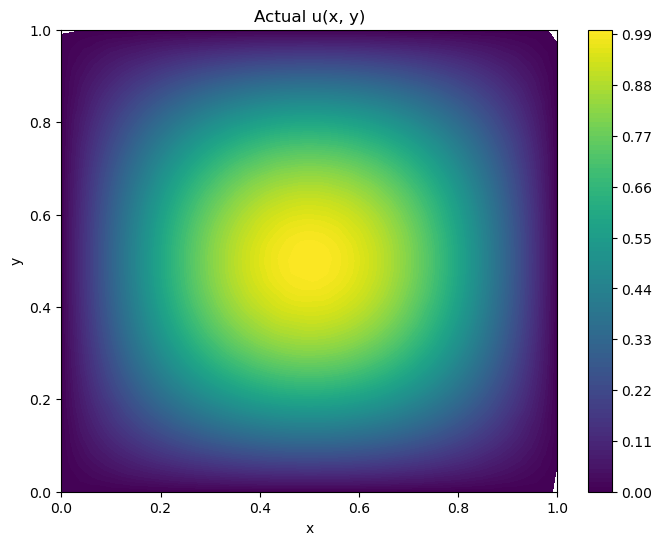

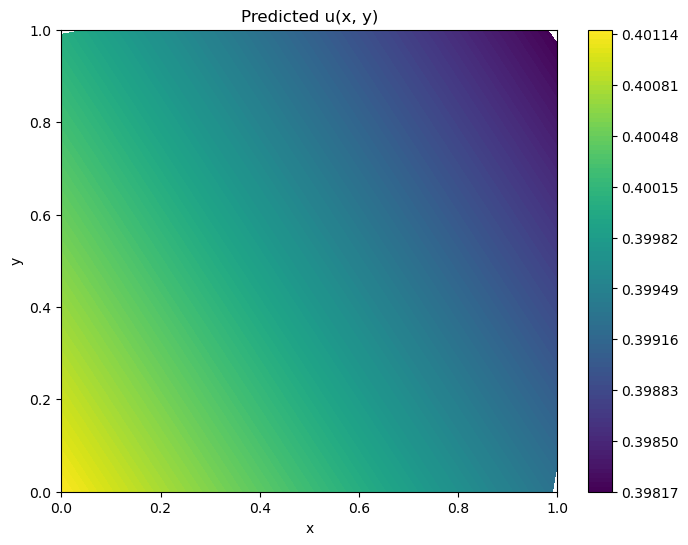

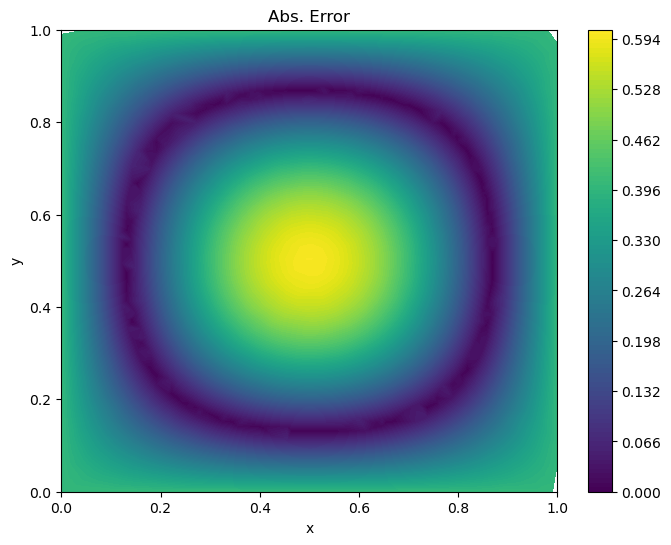

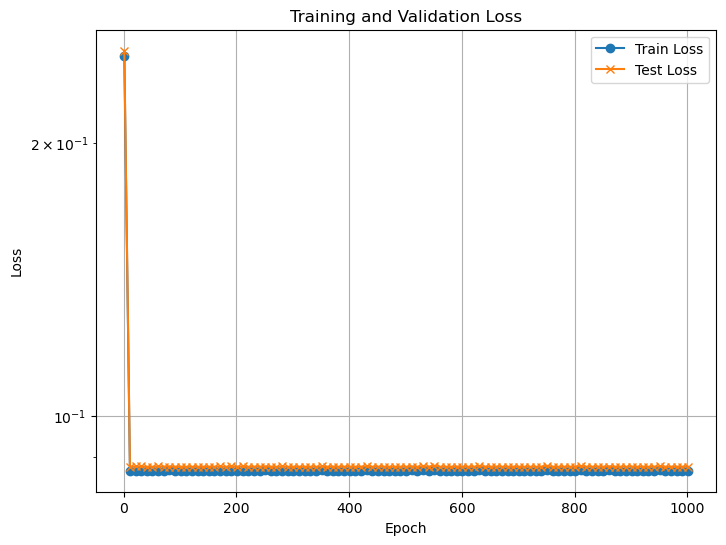

In [54]:
# Visualization
def visualization_2D(x, y, u, title):
    plt.figure(figsize=(8, 6))
    plt.tricontourf(x, y, u, levels=100, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

visualization_2D(x_test[0,:], x_test[1,:], y_test[0,:], title= "Actual u(x, y)")
visualization_2D(x_test[0,:], x_test[1,:], y_pred[0,:], title="Predicted u(x, y)")

abs_error = np.abs(y_pred[0,:] - y_test[0,:])
visualization_2D(x_test[0,:], x_test[1,:], abs_error, title= "Abs. Error")

# In[] Error Curve
def plot_training_history(record):
    epochs = record.get("epoch", [])
    train_loss = record.get("train_loss", [])
    test_loss = record.get("test_loss", [])

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, test_loss, label='Test Loss', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(record)

Similar to tanh, the loss with sigmoid is higher than that of ReLU (0.087 vs 0.010). The sigmoid activation function suffers from gradient saturation near 0 and 1. While both sigmoid and tanh share similar limitations, tanh performs slightly better due to its output range of (−1,1). Although using the sigmoid activation function helps avoid overfitting, its gradient saturation and restricted output range limit the overall accuracy of the model.

**(b)**

The search space in this part includes key hyperparameters such as network architecture, activation function, learning rate, and batch size. 

   - The network architectures range from shallow to deep ([2, 16, 16, 1], [2, 32, 32, 1], [2, 16, 16, 16, 1]).

   - The activation functions ReLU, Tanh, and Sigmoid were chosen to test different types of nonlinear mappings. 

   - Learning rates of 0.001, 0.01, and 0.1 were used to balance training stability and convergence speed. 

   - Batch sizes of 128 and 64 were selected to trade off between training efficiency. 

   - 3-fold cross-validation was applied to evaluate the models while keeping the computational cost manageable.

Starting grid search...
Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.001, Batch Size: 128, Validation Loss: 0.113893
New Best Params: Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.001, Batch Size: 128, Loss: 0.113893
Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.001, Batch Size: 64, Validation Loss: 0.114019
Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.01, Batch Size: 128, Validation Loss: 0.113645
New Best Params: Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.01, Batch Size: 128, Loss: 0.113645
Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.01, Batch Size: 64, Validation Loss: 0.113433
New Best Params: Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.01, Batch Size: 64, Loss: 0.113433
Architecture: [2, 16, 16, 1], Activation: relu, Learning Rate: 0.1, Batch Size: 128, Validation Loss: 0.110631
New Best Params: Architecture: [2, 16, 16, 1], Activation: relu

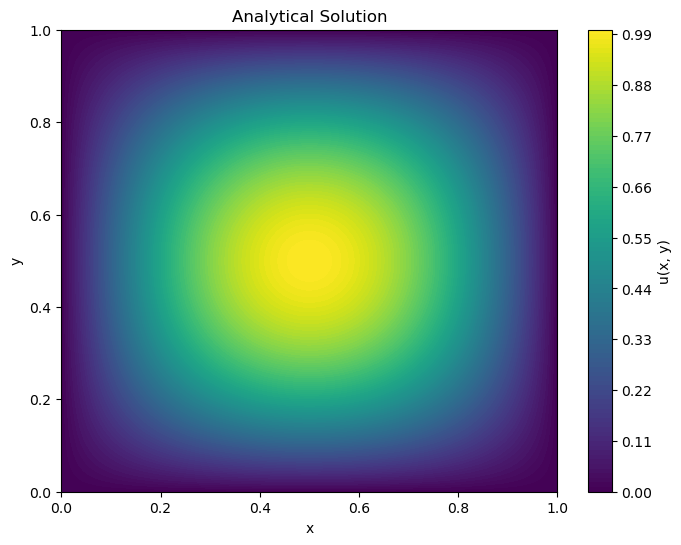

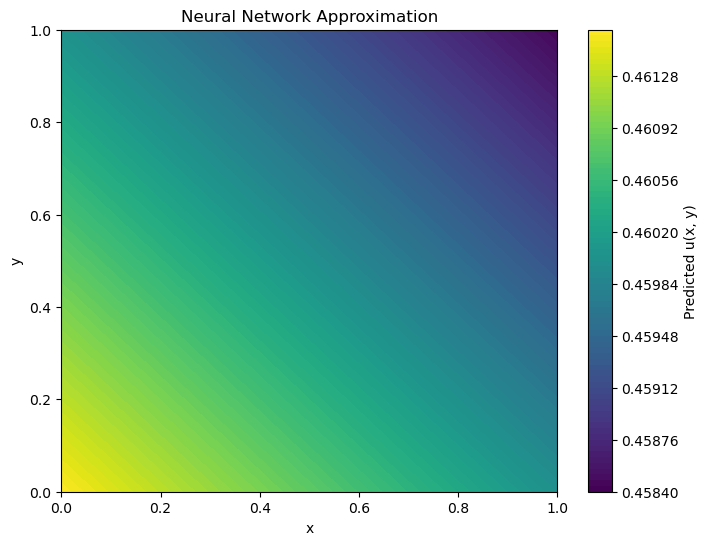

In [60]:
import numpy as np
from matplotlib import pyplot as plt

# Split the data into folds manually for cross-validation
def split_folds(x, y, num_folds):
    fold_size = x.shape[1] // num_folds
    folds = []
    for i in range(num_folds):
        val_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(x.shape[1])) - set(val_indices))
        x_train, x_val = x[:, train_indices], x[:, val_indices]
        y_train, y_val = y[:, train_indices], y[:, val_indices]
        folds.append((x_train, y_train, x_val, y_val))
    return folds

# Define the hyperparameter search space
architectures = [
    [2, 16, 16, 1],  # 2 hidden layers with 16 neurons each
    [2, 32, 32, 1],  # 2 hidden layers with 32 neurons each
    [2, 16, 16, 16, 1]  # 3 hidden layers with 16 neurons each
]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [128, 64]
activation_functions = ["relu", "tanh","sigmoid"]
num_folds = 3

# Generate synthetic data for testing
def generate_data(num_points=10000):
    """
    Generate synthetic data for a Poisson equation problem.
    """
    x = np.linspace(0, 1, int(np.sqrt(num_points)))
    y = np.linspace(0, 1, int(np.sqrt(num_points)))
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.pi * X) * np.sin(np.pi * Y)  # Analytical solution
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    Z_flat = Z.flatten()
    inputs = np.vstack((X_flat, Y_flat))  # Shape: (2, num_points)
    outputs = Z_flat.reshape(1, -1)  # Shape: (1, num_points)
    return inputs, outputs

# Initialize the data
x_data, y_data = generate_data()
folds = split_folds(x_data, y_data, num_folds)

# Evaluate a single configuration
def evaluate_model(architecture, activation, learning_rate, batch_size, folds):
    validation_losses = []
    for x_train, y_train, x_val, y_val in folds:
        # Initialize the network
        nn = FeedforwardNeuralNetwork(architecture, activation_type=activation)

        # Train the network
        nn.train(x_train, y_train, epochs=50, learning_rate=learning_rate, batch_size=batch_size)

        # Validate the network
        predictions, _ = nn.feedforward(x_val)
        val_loss = nn.compute_cost(predictions[-1], y_val)
        validation_losses.append(val_loss)

    return np.mean(validation_losses)

# Perform grid search
best_params = None
best_loss = float('inf')

print("Starting grid search...")

for architecture in architectures:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                avg_loss = evaluate_model(architecture, activation, learning_rate, batch_size, folds)
                print(f"Architecture: {architecture}, Activation: {activation}, Learning Rate: {learning_rate}, "
                      f"Batch Size: {batch_size}, Validation Loss: {avg_loss:.6f}")

                if avg_loss < best_loss:
                    best_loss = avg_loss
                    best_params = (architecture, activation, learning_rate, batch_size)
                    print(f"New Best Params: Architecture: {architecture}, Activation: {activation}, "
                          f"Learning Rate: {learning_rate}, Batch Size: {batch_size}, Loss: {avg_loss:.6f}")

# Train the final model with the best parameters on the entire dataset
final_nn = FeedforwardNeuralNetwork(best_params[0], activation_type=best_params[1])
final_nn.train(x_data, y_data, epochs=200, learning_rate=best_params[2], batch_size=best_params[3])

# Print the best parameters
print(f"\nBest Parameters: Architecture: {best_params[0]}, Activation: {best_params[1]}, "
      f"Learning Rate: {best_params[2]}, Batch Size: {best_params[3]}, Loss: {best_loss:.6f}")

# Visualize the results
predictions, _ = final_nn.feedforward(x_data)
final_predictions = predictions[-1].flatten()

# Plot the 2D heatmap
x = x_data[0, :]
y = x_data[1, :]
z = y_data.flatten()

plt.figure(figsize=(8, 6))
plt.tricontourf(x, y, z, levels=100, cmap='viridis')
plt.colorbar(label="u(x, y)")
plt.title("Analytical Solution")
plt.xlabel("x")
plt.ylabel("y")

plt.figure(figsize=(8, 6))
plt.tricontourf(x, y, final_predictions, levels=100, cmap='viridis')
plt.colorbar(label="Predicted u(x, y)")
plt.title("Neural Network Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


The larger network architecture [2, 32, 32, 1] outperformed the smaller architectures [2, 16, 16, 1] and [2, 16, 16, 16, 1], as increasing the number of neurons improved the network's fitting capacity. The Sigmoid activation function proved to be more suitable for this task. A smaller learning rate (e.g., 0.001) resulted in slower training and suboptimal validation loss. Additionally, a batch size of 64 performed better than 128, likely because smaller batch sizes provide more accurate gradient estimates during weight updates.

**(c)**